# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

#from IPython.core.pylabtools import figsize


#figsize(12, 8)

#sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

#### Característica dos dados

In [5]:
countries_copy = countries.copy()
print(f'Linhas: {countries_copy.shape[0]} | Colunas: {countries_copy.shape[1]}')

Linhas: 227 | Colunas: 20


In [6]:
print(f'Tipos dos dados: {countries_copy.dtypes.unique()}')

Tipos dos dados: [dtype('O') dtype('int64') dtype('float64')]


#### Informações dos dados

In [7]:
countries_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           227 non-null    object 
 1   Region            227 non-null    object 
 2   Population        227 non-null    int64  
 3   Area              227 non-null    int64  
 4   Pop_density       227 non-null    object 
 5   Coastline_ratio   227 non-null    object 
 6   Net_migration     224 non-null    object 
 7   Infant_mortality  224 non-null    object 
 8   GDP               226 non-null    float64
 9   Literacy          209 non-null    object 
 10  Phones_per_1000   223 non-null    object 
 11  Arable            225 non-null    object 
 12  Crops             225 non-null    object 
 13  Other             225 non-null    object 
 14  Climate           205 non-null    object 
 15  Birthrate         224 non-null    object 
 16  Deathrate         223 non-null    object 
 1

#### Estatística dos dados

In [8]:
countries_copy.describe()

,Population,Area,GDP
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


#### Pré-processamento dos dados

In [9]:
countries_copy[['Country', 'Region']] = countries_copy[['Country', 'Region']].apply(lambda x: x.str.strip())

#### Conversão de tipos

In [10]:
cols = ['Pop_density', 'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'Literacy', 'Phones_per_1000', 'Arable', 
        'Crops', 'Other', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']

countries_copy[cols] = countries_copy[cols].apply(lambda x: x.str.replace(',', '.').astype('float'))

#### Dados nulos

In [11]:
data_missing = pd.DataFrame({'nomes': countries_copy.columns, 
                             'tipos': countries_copy.dtypes, 
                             'NA #': countries_copy.isna().sum(),
                             'NA %': (countries_copy.isna().sum() / countries_copy.shape[0]) * 100
                            })

data_missing[data_missing['NA #'] > 0].set_index('nomes')

,tipos,NA #,NA %
nomes,,,
Net_migration,float64,3,1.321586
Infant_mortality,float64,3,1.321586
GDP,float64,1,0.440529
Literacy,float64,18,7.929515
Phones_per_1000,float64,4,1.762115
Arable,float64,2,0.881057
Crops,float64,2,0.881057
Other,float64,2,0.881057
Climate,float64,22,9.691630


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [12]:
def q1():
    regions = list(countries_copy['Region'].unique())
    return sorted(regions)

In [13]:
q1()

['ASIA (EX. NEAR EAST)',
 'BALTICS',
 'C.W. OF IND. STATES',
 'EASTERN EUROPE',
 'LATIN AMER. & CARIB',
 'NEAR EAST',
 'NORTHERN AFRICA',
 'NORTHERN AMERICA',
 'OCEANIA',
 'SUB-SAHARAN AFRICA',
 'WESTERN EUROPE']

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

In [15]:
def q2():
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile').fit_transform(countries_copy[['Pop_density']])
    quantile = np.quantile(discretizer, 0.90)
    return int(sum((discretizer > quantile)))

In [16]:
q2()

23

# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [17]:
def q3():
    return int(countries_copy['Region'].nunique() + countries_copy['Climate'].nunique()) + 1

In [18]:
q3()

18

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [19]:
test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


cols = countries_copy.select_dtypes(['int', 'float']).columns.values

pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())
])

In [21]:
def q4():
    pipe.fit(countries_copy[cols])
    columnTransformer = pipe.transform([test_country[2:]])
    return float(columnTransformer[0][9].round(3))

In [22]:
q4()

-1.047

## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

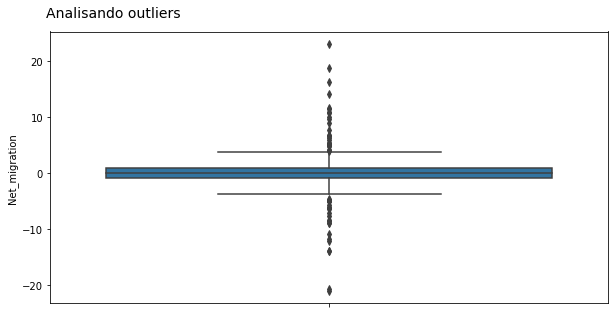

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]

sns.boxplot(y=countries_copy['Net_migration'])

plt.title('Analisando outliers', y=1.03, size=14, loc='left', x=-0.008)
plt.show()

In [24]:
def q5():
    iqr = countries_copy['Net_migration'].quantile(0.75) - countries_copy['Net_migration'].quantile(0.25)
    q1 = countries_copy['Net_migration'].quantile(0.25) - 1.5 * iqr
    q3 = countries_copy['Net_migration'].quantile(0.75) + 1.5 * iqr
    
    outliers_abaixo = int((countries_copy['Net_migration'] < q1).sum())
    outliers_acima =  int((countries_copy['Net_migration'] > q3).sum())
    
    return outliers_abaixo, outliers_acima, False

In [25]:
q5()

(24, 26, False)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [26]:
from sklearn.datasets import load_digits, fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [27]:
count_vectorizer = CountVectorizer()
newsgroups_counts = count_vectorizer.fit_transform(newsgroups.data)
words_idx = sorted([count_vectorizer.vocabulary_.get(f"{word.lower()}") for word in [u"phone"]])

In [28]:
def q6():
    frame = pd.DataFrame(newsgroups_counts[:, words_idx].toarray(), 
                         columns=np.array(count_vectorizer.get_feature_names())[words_idx])
    return int(frame['phone'].sum())

In [29]:
q6()

213

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [30]:
tfidf_transformer = TfidfTransformer()

In [31]:
def q7():
    tfidf_transformer.fit(newsgroups_counts)
    newsgroups_tfidf = tfidf_transformer.transform(newsgroups_counts)

    frame = pd.DataFrame(newsgroups_tfidf[:, words_idx].toarray(), 
                             columns=np.array(count_vectorizer.get_feature_names())[words_idx])
    return float(frame['phone'].sum().round(3))

In [32]:
q7()

8.888